# Beta Bank

## Inicialización

In [1]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

## Cargar datos

In [2]:
#cargar el archivo
try:
    user = pd.read_csv('/datasets/Churn.csv')
except:
    user = pd.read_csv(r'\datasets\Churn.csv')

In [3]:
user.info()
user.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Preparar datos

<AxesSubplot:ylabel='Frequency'>

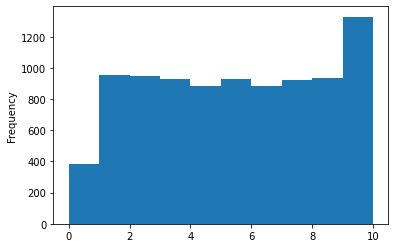

In [4]:
#visualizamos 
user['Tenure'].plot(kind='hist')

Se elegirá la mediana para reemplazar los valores ausentes de la columna *Tenure*.

In [5]:
#encontramos la mediana
ternure_median = user['Tenure'].median()
ternure_median

5.0

In [6]:
#rellenamos ausentes por mediana
user['Tenure'] = user['Tenure'].fillna(ternure_median)

In [7]:
#Se elimina algunas columnas que no son parte del analisis
user = user.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


## Segmentación de datos

In [9]:
#encodificar datos trampa
user_ohe = pd.get_dummies(user, drop_first=True)

#identificar el feature y target
features = user_ohe.drop(['Exited'], axis=1)
target = user_ohe['Exited']

In [10]:
#segmentamos los datos, utilizando el 20% para el testeo de datos y el resto para el entrenamiento y validación en los 
#diferentes modelos 
train_valid, test, train_valid_target, test_target  = train_test_split(features, target, test_size = 0.20,
                                                                     random_state = 12345)


In [11]:
#segmentamos los datos, utilizando el 60% para el entrenamiento de datos y el resto para validación en los 
#diferentes modelos 
train, valid, train_target, valid_target  = train_test_split(train_valid, train_valid_target, test_size = 0.25,
                                                                     random_state = 12345)


In [12]:
#Estandarizar 
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(train[numeric])
train[numeric] = scaler.transform(train[numeric])
valid[numeric] = scaler.transform(valid[numeric])
test[numeric] = scaler.transform(test[numeric])

/tmp/ipykernel_208/614207456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[numeric] = scaler.transform(train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_208/614207456.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

## Modelos de estudio sin equilibrio de clases

### Regresión Logística

In [13]:
#Se ingresa los parametros al modelo de Regresión Logistica
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(train, train_target)
predicted_valid = model.predict(valid)
proba_valid = model.predict_proba(valid)
proba_one_valid = proba_valid[:,1]


print('F1:', f1_score(valid_target, predicted_valid))
print('AUC-ROC:', roc_auc_score(valid_target, proba_one_valid))
print('Accuracy:', accuracy_score(valid_target, predicted_valid))


F1: 0.30131826741996237
AUC-ROC: 0.7703773054064493
Accuracy: 0.8145


### Bosque aleatorio

In [14]:
#Se ingresa los parametros al modelo de Bosque aleatorio
model=RandomForestClassifier(random_state=12345, n_estimators=9)
model.fit(train, train_target)
predicted_valid = model.predict(valid)
proba_valid = model.predict_proba(valid)
proba_one_valid = proba_valid[:,1]


print('F1:', f1_score(valid_target, predicted_valid))
print('AUC-ROC:', roc_auc_score(valid_target, proba_one_valid))
print('Accuracy:', accuracy_score(valid_target, predicted_valid))


F1: 0.5432098765432098
AUC-ROC: 0.7980421827984848
Accuracy: 0.852


### Árbol de decisión

In [15]:
#Se ingresa los parametros al modelo de Arbol de decision
model=DecisionTreeClassifier(random_state=12345)
model.fit(train, train_target)
predicted_valid = model.predict(valid)
proba_valid = model.predict_proba(valid)
proba_one_valid = proba_valid[:,1]


print('F1:', f1_score(valid_target, predicted_valid))
print('AUC-ROC:', roc_auc_score(valid_target, proba_one_valid))
print('Accuracy:', accuracy_score(valid_target, predicted_valid))


F1: 0.48387096774193544
AUC-ROC: 0.6809951694353532
Accuracy: 0.792


El modelo Bosque aleatorio brinda un mejor valor de *F1* que los otros modelos de Arbol y Regresión.

## Modelos de estudio con equilibrio de clases

### Regresión Logística

In [16]:
# Usamos el parametro class_weight para la Regresion Logistica
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(train, train_target)
predicted_valid = model.predict(valid)
proba_valid = model.predict_proba(valid)
proba_one_valid = proba_valid[:,1]


print('F1:', f1_score(valid_target, predicted_valid))
print('AUC-ROC:', roc_auc_score(valid_target, proba_one_valid))
print('Accuracy:', accuracy_score(valid_target, predicted_valid))


F1: 0.4741532976827095
AUC-ROC: 0.7725581328810607
Accuracy: 0.705


In [17]:
# Utilizamos particiones
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(train, train_target)

proba_valid = model.predict_proba(valid)
proba_one_valid = proba_valid[:,1]

for threshold in np.arange(0, 1, 0.03):
    predicted_valid = proba_one_valid > threshold
    print('Threshold:', threshold, 'F1:', f1_score(valid_target, predicted_valid))

Threshold: 0.0 F1: 0.32705980761187786
Threshold: 0.03 F1: 0.32705980761187786
Threshold: 0.06 F1: 0.3273336123901214
Threshold: 0.09 F1: 0.3290924512298558
Threshold: 0.12 F1: 0.33477508650519033
Threshold: 0.15 F1: 0.3464991023339318
Threshold: 0.18 F1: 0.3595714951094551
Threshold: 0.21 F1: 0.3686274509803922
Threshold: 0.24 F1: 0.38315356959424757
Threshold: 0.27 F1: 0.39548629768941435
Threshold: 0.3 F1: 0.4132043255549231
Threshold: 0.32999999999999996 F1: 0.4314903846153846
Threshold: 0.36 F1: 0.43561819346572717
Threshold: 0.39 F1: 0.4445973847212663
Threshold: 0.42 F1: 0.46494464944649444
Threshold: 0.44999999999999996 F1: 0.47189231987331753
Threshold: 0.48 F1: 0.46978723404255324
Threshold: 0.51 F1: 0.4799270072992701
Threshold: 0.54 F1: 0.48282630029440626
Threshold: 0.57 F1: 0.48283261802575106
Threshold: 0.6 F1: 0.482837528604119
Threshold: 0.63 F1: 0.4907521578298397
Threshold: 0.6599999999999999 F1: 0.4847682119205299
Threshold: 0.69 F1: 0.46393210749646396
Threshold: 0

Se observa una decadencia desde Threshold: 0.63, aun sigue por debajo de 0.59.

In [18]:
# Sobremuestreo

#Funcion upsample
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


In [19]:
# Movemos en un rango para encontrar un optimo F1
for i in range(1, 11):
    features_upsampled, target_upsampled = upsample(train, train_target, i)
    model=LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(features_upsampled, target_upsampled)
    predicted_valid=model.predict(valid)

    print('i:', i, 'F1=', f1_score(valid_target, predicted_valid))

i: 1 F1= 0.30131826741996237
i: 2 F1= 0.4839572192513369
i: 3 F1= 0.47991543340380555
i: 4 F1= 0.4771126760563381
i: 5 F1= 0.47049689440993786
i: 6 F1= 0.45084269662921356
i: 7 F1= 0.4362934362934363
i: 8 F1= 0.4268585131894484
i: 9 F1= 0.41533180778032036
i: 10 F1= 0.40484048404840484


El modelo de Regresion Lineal no brindo un *f1_score* óptimo.

### Árbol de decisión

In [20]:
# Usamos el parametro class_weight para el Arbol de decisión
model=DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(train, train_target)
predicted_valid = model.predict(valid)
proba_valid = model.predict_proba(valid)
proba_one_valid = proba_valid[:,1]


print('F1:', f1_score(valid_target, predicted_valid))
print('AUC-ROC:', roc_auc_score(valid_target, proba_one_valid))
print('Accuracy:', accuracy_score(valid_target, predicted_valid))


F1: 0.4708926261319535
AUC-ROC: 0.6705861689123997
Accuracy: 0.7955


In [21]:
#valores iniciales
best_f1 = 0
best_depth = 0

#Recorremos el n_estimators en un rango de numeros en el modelo de Bosque aleatorio
#Para encontrar el mejor F1
for depth in range(1, 10):
    features_upsampled, target_upsampled = upsample(train, train_target, depth)
    model=DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)
    predicted_valid=model.predict(valid)

    if f1_score(valid_target, predicted_valid) > best_f1:
        best_f1 = f1_score(valid_target, predicted_valid)
        best_depth = depth
        
print('El mejor valor para F1 en el conjunto de validación donde depth={} : {}'.format(best_depth, best_f1))
    

El mejor valor para F1 en el conjunto de validación donde depth=6 : 0.5587044534412956


In [22]:
# Utilizamos particiones
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(train, train_target)

proba_valid = model.predict_proba(valid)
proba_one_valid = proba_valid[:,1]

for threshold in np.arange(0, 1, 0.2):
    predicted_valid = proba_one_valid > threshold
    print('Threshold:', threshold, 'F1:', f1_score(valid_target, predicted_valid))

Threshold: 0.0 F1: 0.4708926261319535
Threshold: 0.2 F1: 0.4708926261319535
Threshold: 0.4 F1: 0.4708926261319535
Threshold: 0.6000000000000001 F1: 0.4708926261319535
Threshold: 0.8 F1: 0.4708926261319535


El valor de *f1_score* utilizando sobremuestreo en el modelo de Arbol de decision es de 0.55, se logro un aumento con respecto al modelo anterior.

### Bosque aleatorio

In [23]:
# Usamos el parametro class_weight para el Bosque aleatorio
model=RandomForestClassifier(random_state=12345, n_estimators=9, class_weight='balanced')
model.fit(train, train_target)
predicted_valid = model.predict(valid)
proba_valid = model.predict_proba(valid)
proba_one_valid = proba_valid[:,1]


print('F1:', f1_score(valid_target, predicted_valid))
print('AUC-ROC:', roc_auc_score(valid_target, proba_one_valid))
print('Accuracy:', accuracy_score(valid_target, predicted_valid))


F1: 0.553323029366306
AUC-ROC: 0.8058078042468912
Accuracy: 0.8555


In [24]:
#valores iniciales
best_f1 = 0
best_est = 0

#Recorremos el n_estimators en un rango de numeros en el modelo de Bosque aleatorio
#Para encontrar el mejor F1
for est in range(1, 45):
    features_upsampled, target_upsampled = upsample(train, train_target, est)
    model=RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)
    predicted_valid=model.predict(valid)

    if f1_score(valid_target, predicted_valid) > best_f1:
        best_f1 = f1_score(valid_target, predicted_valid)
        best_est = est
        
print('El mejor valor para F1 en el conjunto de validación donde n_estimators={} : {}'.format(best_est, best_f1))
    

El mejor valor para F1 en el conjunto de validación donde n_estimators=26 : 0.6027777777777777


In [25]:
# Utilizamos particiones
model = RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(train, train_target)

proba_valid = model.predict_proba(valid)
proba_one_valid = proba_valid[:,1]

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = proba_one_valid > threshold
    print('Threshold:', threshold, 'F1:', f1_score(valid_target, predicted_valid))
    

Threshold: 0.0 F1: 0.3409490333919157
Threshold: 0.02 F1: 0.37120470127326155
Threshold: 0.04 F1: 0.40410588870880604
Threshold: 0.06 F1: 0.4376498800959233
Threshold: 0.08 F1: 0.4578469520103761
Threshold: 0.1 F1: 0.48202959830866804
Threshold: 0.12 F1: 0.5007564296520424
Threshold: 0.14 F1: 0.5144694533762059
Threshold: 0.16 F1: 0.533795493934142
Threshold: 0.18 F1: 0.5547309833024119
Threshold: 0.2 F1: 0.5669599217986315
Threshold: 0.22 F1: 0.5823045267489713
Threshold: 0.24 F1: 0.5830653804930332
Threshold: 0.26 F1: 0.5841694537346711
Threshold: 0.28 F1: 0.591907514450867
Threshold: 0.3 F1: 0.5961070559610706
Threshold: 0.32 F1: 0.5939086294416243
Threshold: 0.34 F1: 0.5981554677206852
Threshold: 0.36 F1: 0.595108695652174
Threshold: 0.38 F1: 0.5935302390998594
Threshold: 0.4 F1: 0.5890804597701149
Threshold: 0.42 F1: 0.5748148148148148
Threshold: 0.44 F1: 0.5623100303951368
Threshold: 0.46 F1: 0.5571205007824725
Threshold: 0.48 F1: 0.5532591414944356
Threshold: 0.5 F1: 0.546925566

En el modelo de Bosque aleatorio el threshold 0.3, el *f1_score* es de 0.6.

## Modelo Bosque aleatorio en conjunto de prueba

In [26]:
#prueba final
proba_test = model.predict_proba(test)
proba_one_test = proba_test[:,1]
predicted_test = proba_one_test > 0.3


print('F1:', f1_score(test_target, predicted_test))
print('AUC-ROC:', roc_auc_score(valid_target, proba_one_test))
print('Accuracy:', accuracy_score(valid_target, predicted_test))


F1: 0.6237054085155351
AUC-ROC: 0.5070940473900803
Accuracy: 0.6755


Se muestra un *f1_score* de 0.62.

## Conclusiones

1. Se completo con la mediana los valores ausentes de la columna *Tenure* en lugar de la media, al observase extremos con mayor cantidad.

2. El modelo de Regresión Logística mostró el valor de *f1_score* por debajo de lo solicitado que es de 0.59, al igual que el modelo de Arbol de decisión.

3. En el modelo de Bosque aleatorio nos brindo un *f1_score* de acuerdo a lo solicitado, esto cuando se tiene un umbral de 0.3.